This note book will serve as a space to chceck the stellar types of WDs and check if they merge in a Hubble time
The steps to accomplishing this:
- reading in the file
- analyzing the stellar type distribution
- looking at just the WD+WD binaires and the combos that encompass this
- calcuate the coalescence time
- calculate the delay time
- calculate if the binary merges within a hubble time

In [1]:
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

### Reading in the h5 file

In [2]:
# reading in the HDF5 file - this file is the AIS file that we should expect many WDs in
pathToWDWD_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_wWeights_SM.h5' #path of the hdf5 file

Data_WD = h5.File(pathToWDWD_H5 )

In [3]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
WD_SYS = pd.DataFrame() # making a pandas dataframe

for key in Data_WD["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    WD_SYS[key] = Data_WD["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [4]:
WD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,1,0,1,0,0.0,1397.530986,0,1.0,10.000000
1,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,8,1,1,0.0,2269.769501,0,1.0,10.000000
2,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,0,1,0,0.0,13757.046608,0,1.0,10.000000
3,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,11,1,1,0.0,13734.226416,0,1.0,9.999997
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,0,1,0,0.0,13782.210927,0,1.0,9.999677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,14187.533754,0,1.0,0.416246
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,13901.519164,0,1.0,0.087445
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,13922.219796,0,1.0,0.122957
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,12,11,1,1,0.0,13772.504859,0,1.0,0.128802


#### Let's look at the stellar type distribution to see if we do actually get WDs

In [10]:
# # let's look and see the range of stellar types

# hist, bin_edges = np.histogram(WD_SYS['Stellar_Type(1)'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.hist(WD_SYS["Stellar_Type(1)"])
# plt.xlabel("Stellar Type of Star 1")

Text(0.5, 0, 'Stellar Type of Star 1')

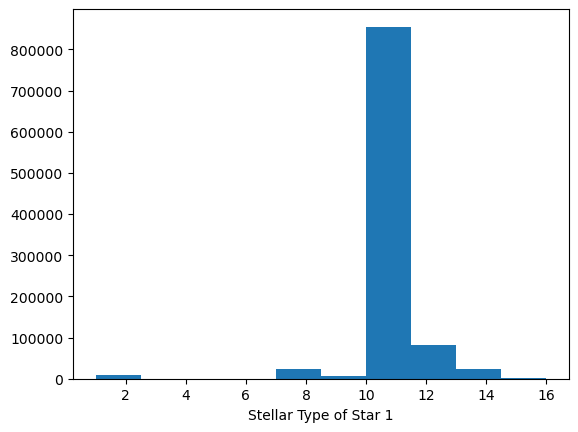

In [9]:
plt.hist(WD_SYS["Stellar_Type(1)"])
plt.xlabel("Stellar Type of Star 1")

Text(0.5, 0, 'Stellar Type of Star 2')

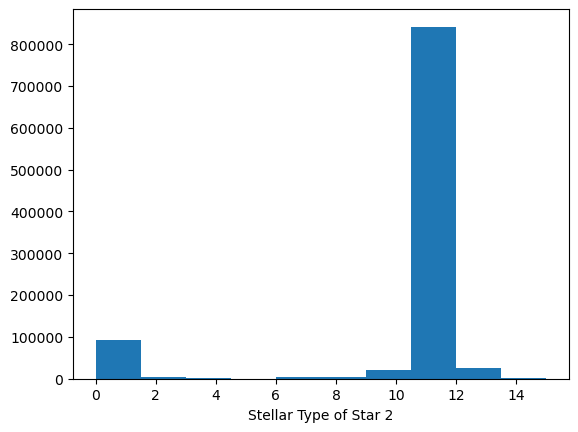

In [11]:
plt.hist(WD_SYS["Stellar_Type(2)"])
plt.xlabel("Stellar Type of Star 2")

These stellar types make sense because since star 1 is less massive at ZAMS it seems to be less evloved on average than the primary star.

#### Below is the function to find what the different combinations of WDs exist in this output of the simulation

In [12]:
def WD_BINARY_BOOLS(dataframe):

# let's first look at if there are only helium white dwarf WD binaries
    HeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==10)
# then carbon oxygen WD
    COWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==11)
# then oxgen neon WD
    ONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==12)

# let's look at the combination of WD binaries

# Helium WD combos
    HeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==11)
    HeONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==12)

# Carbon Oxygen WD combos
    COHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==10)
    COONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==12)

# Oxygen Neon WD combos
    ONeHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==10)
    ONeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==11)

    # let's return all of these bools
    return(HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool)


In [15]:
# let's now create a dataframe where the above criteria is met based on all of the bools

WDWD_SYS = WD_SYS.loc[(WD_BINARY_BOOLS(WD_SYS)[0])|(WD_BINARY_BOOLS(WD_SYS)[1])|(WD_BINARY_BOOLS(WD_SYS)[2])|(WD_BINARY_BOOLS(WD_SYS)[3])|(WD_BINARY_BOOLS(WD_SYS)[4])|(WD_BINARY_BOOLS(WD_SYS)[5])|(WD_BINARY_BOOLS(WD_SYS)[6])|(WD_BINARY_BOOLS(WD_SYS)[7])|(WD_BINARY_BOOLS(WD_SYS)[8])]
WDWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
3,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,11,1,1,0.0,13734.226416,0,1.0,9.999997
5,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,14127.407871,0,1.0,0.375554
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,14037.450094,0,1.0,8.699165
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,13828.031985,0,1.0,0.115519
10,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,13727.752620,0,1.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,14187.533754,0,1.0,0.416246
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,13901.519164,0,1.0,0.087445
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,13922.219796,0,1.0,0.122957
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,12,11,1,1,0.0,13772.504859,0,1.0,0.128802


As we can tell by the length of this table (850000) most of these systems were WD+WD

#### Let's now calcualte the coalescence time of these WD+WD

In [16]:
# let's now make the definition for the coalescence time (no variations for the very small or very larger eccentiricies)

def tgw(a,e,M1,M2):
    return ((((5*((a*u.m)**4)*(const.c**5))/(256*(const.G**3)*(M1*u.kg)*(M2*u.kg)*((M1*u.kg)+(M2*u.kg))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

In [27]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_WD['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

b'Msol'
b'Rsol'
b'Myr'


In [19]:
# let's just look at double helium WDs to start, this cell (because of the for loop) takes about 8 mins to run

# let's gather the semi major axis
a_wd = np.array(WDWD_SYS['SemiMajorAxis'])*(6.96e8) # converting from Rsun to meters

# the eccentricites
e_wd = np.array(WDWD_SYS['Eccentricity'])

# masses
M1_wd = np.array(WDWD_SYS['Mass(1)'])*(1.989e30) # converting from solar masses to kg
M2_wd = np.array(WDWD_SYS['Mass(2)'])*(1.989e30)

# let's calculate the coalescence time

time_gw = [] # this list will be th ecoalescence time of all of the WD binaries

for seeds in range(WDWD_SYS.shape[0]): # looping though all of the binaries

    t_gw = tgw(a_wd[seeds],e_wd[seeds],M1_wd[seeds],M2_wd[seeds])
    time_gw.append(t_gw.value)

Let's add the coalescence time as a column to the dataframe

In [20]:
WDWD_SYS['Coalescence Time'] = time_gw

/tmp/ipykernel_836295/2736933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['Coalescence Time'] = time_gw


In [21]:
WDWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,Coalescence Time
3,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,10,11,1,1,0.0,13734.226416,0,1.0,9.999997,1.512802e+04
5,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,11,11,1,1,0.0,14127.407871,0,1.0,0.375554,3.742712e+18
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,11,11,1,1,0.0,14037.450094,0,1.0,8.699165,5.305653e+16
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,11,11,1,1,0.0,13828.031985,0,1.0,0.115519,1.958439e+16
10,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,10,10,1,1,0.0,13727.752620,0,1.0,10.000000,7.658429e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,11,11,1,1,0.0,14187.533754,0,1.0,0.416246,8.084049e+17
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,11,11,1,1,0.0,13901.519164,0,1.0,0.087445,5.046087e+19
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,11,11,1,1,0.0,13922.219796,0,1.0,0.122957,3.556365e+24
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,12,11,1,1,0.0,13772.504859,0,1.0,0.128802,8.745993e+21


In [22]:
# in case you run the cell above more than once here is a way to remove the extra column
# WDWD_SYS = WDWD_SYS.drop('Coalescence Time', axis=1)

Let's rename the Merger column so that it is more reflective of what the flag is catching...a stellar merger

In [23]:
WDWD_SYS.columns = WDWD_SYS.columns.str.replace('Merger', 'Merger due to Mass Transfer')

Let's now calculate the time delay!

In [24]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time = np.array(WDWD_SYS['Time'])
t_col = np.array(WDWD_SYS['Coalescence Time'])

t_delay = [] # this will hold the delay time in Myr

for binaries in range(WDWD_SYS.shape[0]):

    delay = time[binaries] + t_col[binaries] # adding the two values together to get the delay time
    t_delay.append(delay)


In [25]:
WDWD_SYS['Delay Time'] = t_delay

/tmp/ipykernel_836295/2862924309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['Delay Time'] = t_delay


In [26]:
# in case you need to remove the column
# WDWD_SYS = WDWD_SYS.drop('Delay Time', axis=1)

Let's now make a flag to see if there are WD+WD binaries where there is a merger (not just a stellar merger but due to gravitational waves) within hubble time

In [28]:
# first let's take the delay time column and make it a numpy array
delay_time = np.array(WDWD_SYS['Delay Time'])

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

hubble_merger = []

for times in delay_time:

    if (times > age_universe):
        hubble_merger.append(0)

    elif (times < age_universe):
        hubble_merger.append(1)


In [29]:
WDWD_SYS['Merger due to GW'] = hubble_merger

/tmp/ipykernel_836295/2795056436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['Merger due to GW'] = hubble_merger


In [30]:
# in case you need to remove the column
# WDWD_SYS = WDWD_SYS.drop('Merger due to GW', axis=1)

In [32]:
# let's check to see if there are any binaries who did merge before hubble time

pd.set_option('display.max_columns', None) # allows us to see all of the columns
display(WDWD_SYS[WDWD_SYS["Merger due to GW"]==1])

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to Mass Transfer,Merger due to Mass Transfer_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,Coalescence Time,Delay Time,Merger due to GW
13,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.593913,0.246345,1.888582,1.430485,1,0,0.001883,0.001883,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,0.043346,1.194675,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2203.361047,0,1.0,6.633484,0.004320,2203.365366,1
282,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.804574,0.263241,2.559901,1.498617,1,0,0.000173,0.000173,0.0,0.0,0,1,282,0.101516,0.391722,0.295351,0.761335,-0.407165,-0.930712,0.193855,6.233391,0.054719,1.265116,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1661.616350,0,1.0,9.812540,0.005963,1661.622313,1
390,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.245348,0.270718,1.864383,0.879989,1,0,0.000152,0.000152,0.0,0.0,0,1,390,0.638525,0.563484,1.285136,6.110702,-0.103642,0.144511,0.677543,5.528398,0.014152,0.016368,265.0,265.0,30.0,30.0,10,10,1,1,0.0,1987.560727,0,1.0,10.000000,0.000176,1987.560903,1
678,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'2 ',b'3 ',0.517893,0.215305,3.469111,1.239958,1,0,0.003247,0.003247,0.0,0.0,0,1,678,0.919455,0.550116,2.727400,4.401147,0.062821,0.528544,2.538474,0.421584,0.030230,0.048591,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2808.980120,0,1.0,9.999974,0.001537,2808.981656,1
682,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.211159,0.285340,1.409574,0.735179,1,0,0.000270,0.000270,0.0,0.0,0,1,682,0.699443,0.380188,6.209512,2.013284,-0.792668,0.129883,0.825178,2.059652,0.037536,0.023954,265.0,265.0,30.0,30.0,10,10,1,1,0.0,6553.614307,0,1.0,10.000000,0.009983,6553.624290,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.470100,0.245102,1.579281,1.147624,1,0,0.000381,0.000381,0.0,0.0,0,1,990696,0.522491,0.760319,2.324036,1.632675,0.649350,-0.239432,2.754680,0.610730,0.051532,0.781763,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3876.053724,0,1.0,1.411546,0.012873,3876.066598,1
994640,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.390258,0.197062,1.636905,1.143355,1,0,0.001889,0.001889,0.0,0.0,0,1,994640,0.340462,0.134833,4.885396,4.078910,-1.521185,0.107456,2.682743,1.331618,0.025186,0.625782,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4344.323222,0,1.0,1.385454,0.001340,4344.324562,1
995736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.456693,0.237171,1.535040,1.163256,1,0,0.000294,0.000294,0.0,0.0,0,1,995736,0.791869,0.453936,2.789666,0.552527,0.050858,-0.325226,1.544295,3.218876,0.043641,0.661934,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3659.690788,0,1.0,1.135102,0.007261,3659.698048,1
996451,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.419092,0.177682,1.409679,0.922890,1,0,0.002185,0.002185,0.0,0.0,0,1,996451,0.379445,0.895692,5.076869,0.161869,-0.821010,-1.224126,4.623775,4.818819,0.030964,0.904166,265.0,265.0,30.0,30.0,10,10,1,1,0.0,9220.525957,0,1.

### Let's do these same steps but with the larger COMPAS output

In [3]:
# reading in the HDF5 file - this file is the AIS file that we should expect many WDs in
pathToWDWD_LG_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LG_1e8.h5' #path of the hdf5 file

Data_WD_LG = h5.File(pathToWDWD_LG_H5)

In [5]:
SNs = Data_WD_LG['BSE_Supernovae'] #specifically looking at the supernovae events
# list(SNs.keys()) #listing the parameters recorded for each supernova

In [6]:
# reading in the supernova data

SNs_LG_table = Table(SNs)
SNs_LG_table

Applied_Kick_Magnitude(SN),ComponentSpeed(CP),ComponentSpeed(SN),Drawn_Kick_Magnitude(SN),Eccentricity,Eccentricity<SN,Experienced_RLOF(SN),Fallback_Fraction(SN),Is_Hydrogen_Poor(SN),Kick_Magnitude(uK),Luminosity(CP),Luminosity(SN),MT_Donor_Hist(SN),Mass(CP),Mass(SN),Mass@ZAMS(CP),Mass@ZAMS(SN),Mass_CO_Core@CO(SN),Mass_Core@CO(SN),Mass_He_Core@CO(SN),Mass_Total@CO(SN),Metallicity@ZAMS(1),Orb_Velocity<SN,Radius(CP),Radius(SN),Record_Type,SEED,SN_Kick_Mean_Anomaly(SN),SN_Kick_Phi(SN),SN_Kick_Theta(SN),SN_Orbit_Inclination_Angle,SN_Type(SN),SemiMajorAxis,SemiMajorAxis<SN,Stellar_Type(CP),Stellar_Type(SN),Stellar_Type_Prev(SN),Supernova_State,SystemicSpeed,Teff(CP),Teff(SN),Time,Unbound
float64,float64,float64,float64,float64,float64,uint8,float64,uint8,float64,float64,float64,bytes17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint32,uint64,float64,float64,float64,float64,int32,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,uint8
817.7011203819649,33.92618256484478,1633.4448474565065,817.7011203819649,7579.116385817825,0.0,0,0.06355510517830787,0,42.83858440488117,10.083523981326946,2.946467550957614,NA,1.6184996589186929,1.788164630794101,1.6184996589186929,14.169186135547056,3.5012890059084523,4.961988694865322,4.961988694865322,12.75430543720183,0.002814204857951377,19.0879584781236,1.1671328850044878,1.4374011786689665e-05,1,72000001,4.800917257291339,-0.029353169533815837,2.0217556865137656,1.9977523462486597,1,-0.9912869278120094,7522.175518277093,1,13,5,1,864.5051039175034,9530.604957250278,1996705.2270349816,17.116222310804336,1
475.267353397217,63.13743763631991,937.9804015191453,475.267353397217,26.374209116574118,0.0,1,0.1726556819263592,1,4.531315477052654,7671.308503935725,2.7174290977465145,2,10.273220101770999,1.58377082571723,9.51591437807692,19.55091184745775,3.2437911556934176,3.2437911556934176,4.512347276764588,4.512347276764588,0.012002207400383538,104.88507273529092,4.555506689069568,1.4374011786689665e-05,1,72000057,0.24380073996512702,0.7820024149203473,1.4616664372798183,1.2994858982548896,1,-10.05762114099046,256.2899149591946,1,13,8,1,130.02250606525152,25335.329404555207,1956717.3440516754,10.82886600500499,1
276.37202794471665,937.9804015191453,414.3747279358504,276.37202794471665,26.374209116574118,26.374209116574118,0,0.023745940590585782,0,nan,8.269835251679375e-05,2.354811768234117,NA,1.58377082571723,1.2775835252086558,19.55091184745775,9.51591437807692,2.0092550932504976,3.0462724291134213,3.0462724291134213,9.622492225020187,0.012002207400383538,nan,1.4374011786689665e-05,1.4374011786689665e-05,1,72000057,3.611231120419878,0.36895677858619624,2.5450866744700154,1.2994858982548896,1,-10.646085333530227,-10.646085333530227,13,13,5,2,130.02250606525152,145332.5031174102,1887893.923293176,28.956064143897358,1
638.3543711112787,31.404833918038804,1275.9905418459641,638.3543711112787,2118.575451186151,0.0,0,0.031672267187960394,0,29.740376254947275,389.64126458761456,2.4720182504673534,NA,4.098772329865896,1.3741448533752647,4.098779469352163,11.302424861190335,2.7315308184591887,3.970993710560523,3.970993710560523,11.169775998531183,0.00010922626219976388,21.46423319056326,1.5786122516269392,1.4374011786689665e-05,1,72000066,6.199158007882436,-0.14898545596503254,5.249120145803547,1.5702928831645744,1,-2.565944526241831,6319.575138583685,1,13,5,1,321.9025222548755,20431.77225483057,1910959.3876177096,23.18795830904987,1
404.3517615022034,52.19487138012445,811.4848978928572,404.3517615022034,314.5600747725887,0.0,0,0.16936399097195964,0,12.080969193768722,416.7587381110478,1e-10,NA,4.245829634969529,3.7129761983179006,4.2458443479917145,16.597543843274284,4.445737875309822,6.199328877658351,6.199328877658351,16.137724264149842,0.00041284860336228933,33.470142586802154,1.705272717967287,1.57430190808679e-05,1,72000080,1.1700670961168067,0.7550093065319907,2.3034101529985436,1.1280714515390267,1,-8.872715412076767,3469.6500246

In [ ]:
df = pd.DataFrame(np.array(h5py.File(path)['variable_1']))

In [7]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
WD_SYS_LG = pd.DataFrame() # making a pandas dataframe

for key in Data_WD_LG["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    WD_SYS_LG[key] = Data_WD_LG["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

: 

Let's look at the stellar type distribution of systems in this output